## Telco Customer Churn Analize

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/NirmalSankalana/telco-customer-churn-analyse/main/Train_Dataset.csv')
rows, columns = df.shape
rows , columns

(2321, 21)

### Dropping Duplicates

In [41]:
print('No of duplicates: ' + str(df.duplicated().sum()))
df.customer_id.drop_duplicates()
df.drop_duplicates()

No of duplicates: 0


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,3317,109.0,452,no,no,0.0,180.0,100.0,30.60,229.0,...,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,No,NaN
2317,3318,185.0,452,yes,yes,30.0,154.1,114.0,26.20,118.7,...,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,No,NaN
2318,3319,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,...,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes,NaN
2319,3320,138.0,547,yes,no,0.0,191.2,130.0,32.35,164.5,...,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,Yes,NaN


### Impute Missing Values

Dropping unused column

In [42]:
del df['Unnamed: 20']
df_without_id = df.iloc[:, 1:]
df = df_without_id

In [43]:
def d_types_report(df):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    
    for i in df.columns:
        columns.append(i)
        d_types.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        null_values.append(df[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / rows)

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})
report = d_types_report(df)
report

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,account_length,float64,"[15.0, 105.0, 97.0, 121.0, 98.0]",204,2,0.086170
1,location_code,int64,"[452, 445, 547]",3,0,0.000000
2,intertiol_plan,object,"[no, yes, nan]",2,3,0.129255
3,voice_mail_plan,object,"[no, yes, nan]",2,6,0.258509
4,number_vm_messages,float64,"[0.0, 32.0, 35.0, 22.0, 17.0]",44,3,0.129255
5,total_day_min,float64,"[121.1, 259.3, 183.4, 68.7, 278.3]",1410,1,0.043085
6,total_day_calls,float64,"[130.0, 96.0, 94.0, 95.0, 89.0]",118,3,0.129255
7,total_day_charge,float64,"[20.59, 44.08, 31.18, 11.68, 47.31]",1445,5,0.215424
8,total_eve_min,float64,"[216.0, 175.2, 269.1, 209.2, 93.4]",1357,3,0.129255
9,total_eve_calls,float64,"[86.0, 97.0, 120.0, 69.0, 143.0]",117,4,0.172340


In [44]:
categorical_columns = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']

In [45]:
null_columns = report[report['Null_Values'] > 0 ]['Columns'].tolist()

##### Impute features using KNN

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 
    
mice_imputer = IterativeImputer()
imputer = SimpleImputer(strategy='most_frequent')

for col in null_columns:
    if col in categorical_columns:
        impute = imputer.fit(df[[col]])
        df[[col]] = impute.transform(df[[col]])
    else:
        df[col] = mice_imputer.fit_transform(df[[col]])



In [47]:
d_types_report(df)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,account_length,float64,"[15.0, 105.0, 97.0, 121.0, 98.0]",205,0,0.0
1,location_code,int64,"[452, 445, 547]",3,0,0.0
2,intertiol_plan,object,"[no, yes]",2,0,0.0
3,voice_mail_plan,object,"[no, yes]",2,0,0.0
4,number_vm_messages,float64,"[0.0, 32.0, 35.0, 22.0, 17.0]",45,0,0.0
5,total_day_min,float64,"[121.1, 259.3, 183.4, 68.7, 278.3]",1411,0,0.0
6,total_day_calls,float64,"[130.0, 96.0, 94.0, 95.0, 89.0]",119,0,0.0
7,total_day_charge,float64,"[20.59, 44.08, 31.18, 11.68, 47.31]",1446,0,0.0
8,total_eve_min,float64,"[216.0, 175.2, 269.1, 209.2, 93.4]",1358,0,0.0
9,total_eve_calls,float64,"[86.0, 97.0, 120.0, 69.0, 143.0]",118,0,0.0


### Treating Outliers

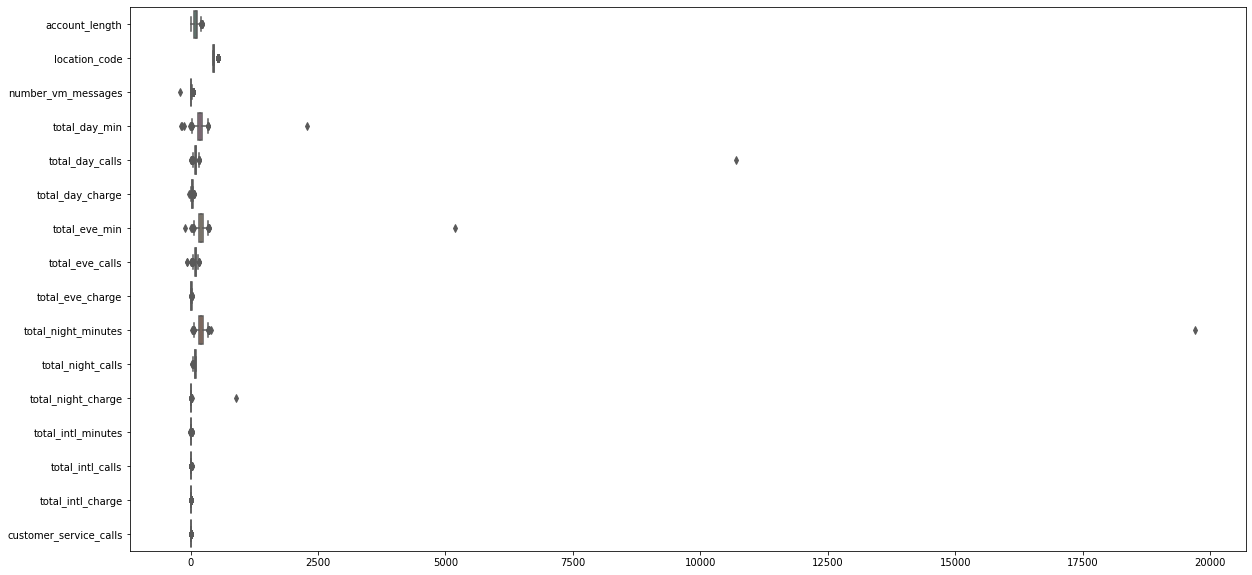

In [48]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [49]:
#sns.pairplot(df)

In [50]:
for i in df.columns:
    if i in categorical_columns:
        continue
    else:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        df[i] = df[i].apply(lambda x: df[i].median() if (x > Upper_Whisker or x < Lower_Whisker)  else x)

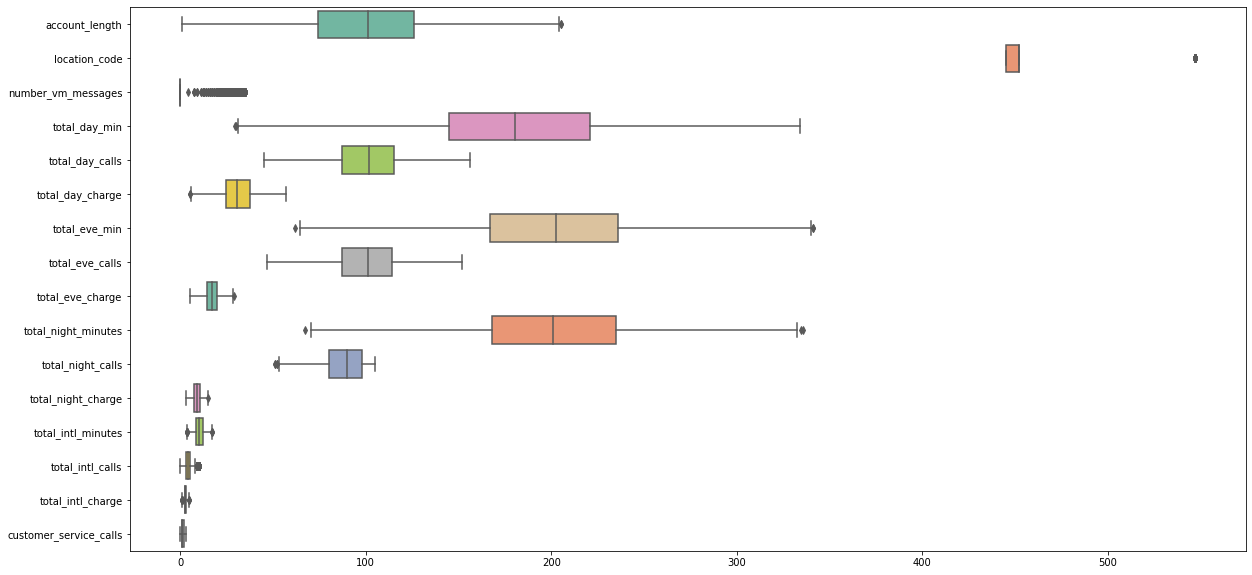

In [51]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [52]:
#sns.pairplot(df)

#### Churn and Retain

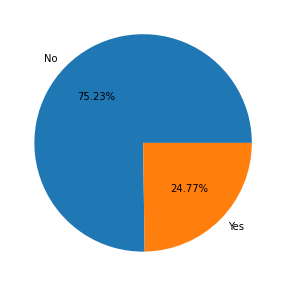

In [53]:
plt.figure(figsize=(10,5))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%.2f%%')
plt.show()

#### Location Code

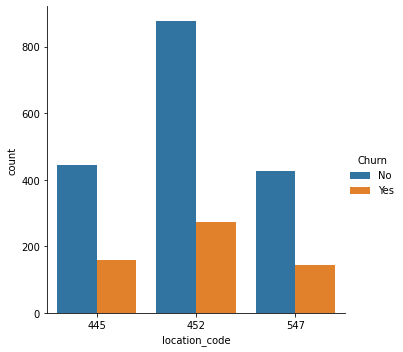

In [54]:
sns.catplot(x='location_code', hue='Churn', kind='count', data=df)

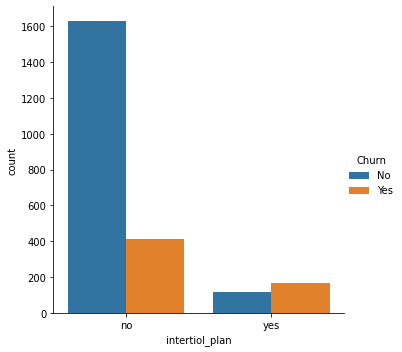

In [55]:
sns.catplot(x='intertiol_plan', hue='Churn', kind='count', data=df)

#### Customer Account Length

/home/nirmal/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nirmal/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


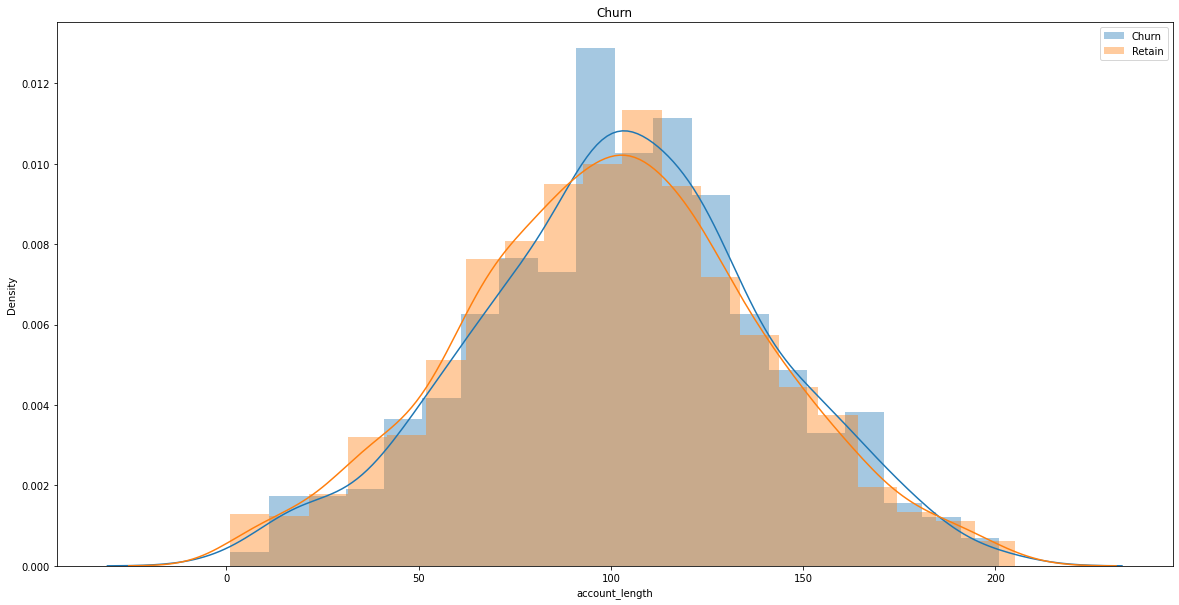

In [56]:
plt.figure(figsize=(20,10))
plt.title('Churn')
sns.distplot(df[df['Churn'] == 'Yes']['account_length'],  label='Churn', bins=20)
sns.distplot(df[df['Churn'] == 'No']['account_length'],  label='Retain', bins=20)
plt.legend(loc= 'upper right')
plt.show()

/home/nirmal/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


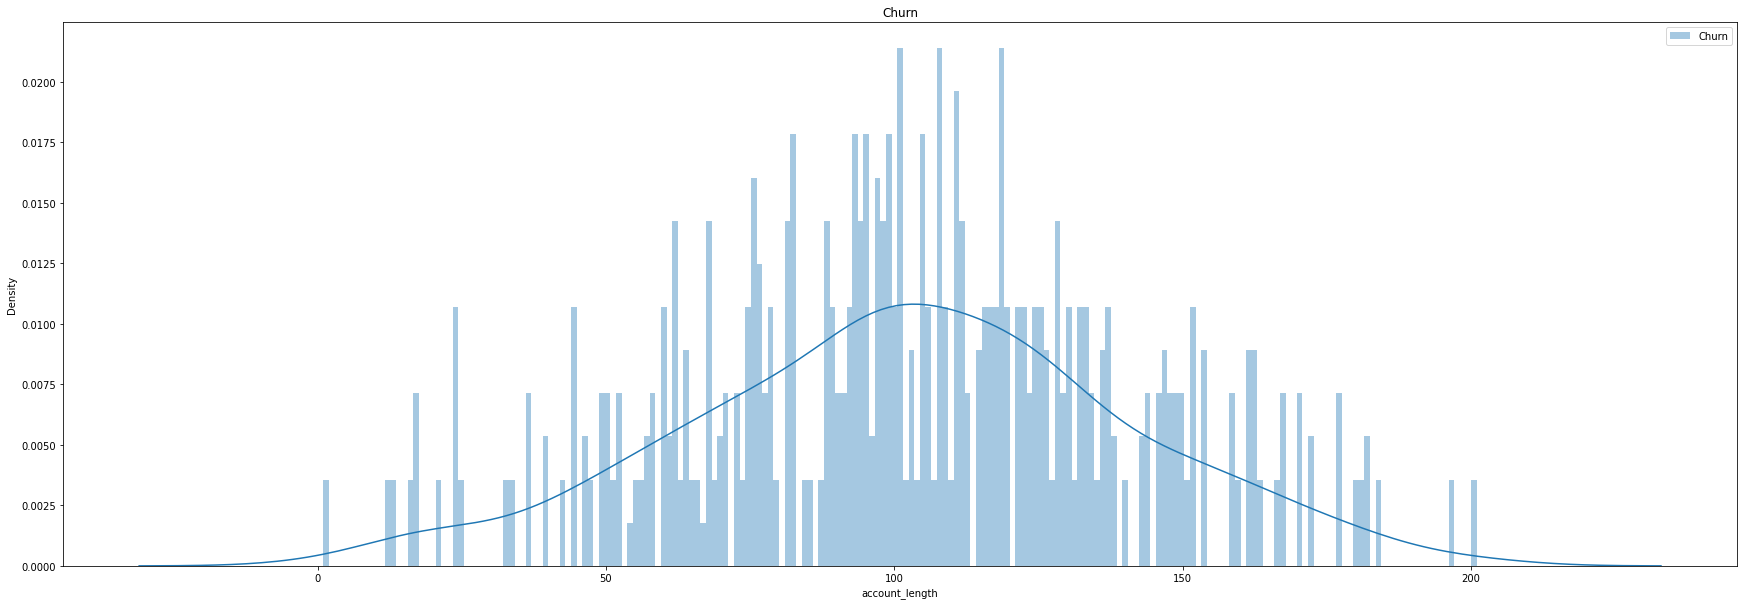

In [57]:
plt.figure(figsize=(30,10))
plt.title('Churn')
n_bin = int(df['account_length'].max())
sns.distplot(df[df['Churn'] == 'Yes']['account_length'],  label='Churn', bins=n_bin)
# sns.distplot(df[df['Churn'] == 'No']['account_length'],  label='Retain', bins=n_bin)
plt.legend(loc= 'upper right')
plt.show()

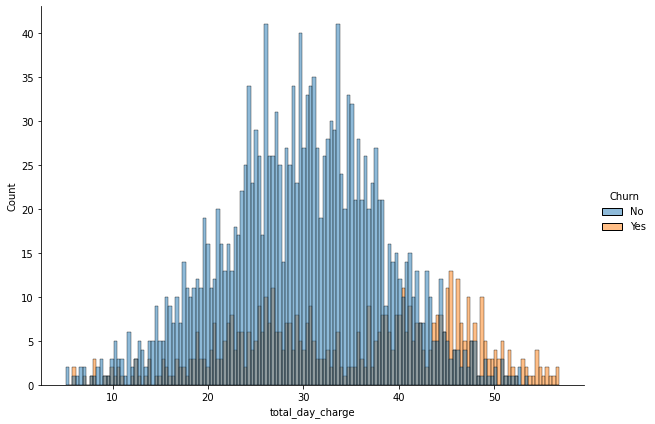

In [58]:
sns.displot(data=df, x='total_day_charge', kind='hist',
            height=6, aspect=1.4, bins=144,
            hue='Churn')

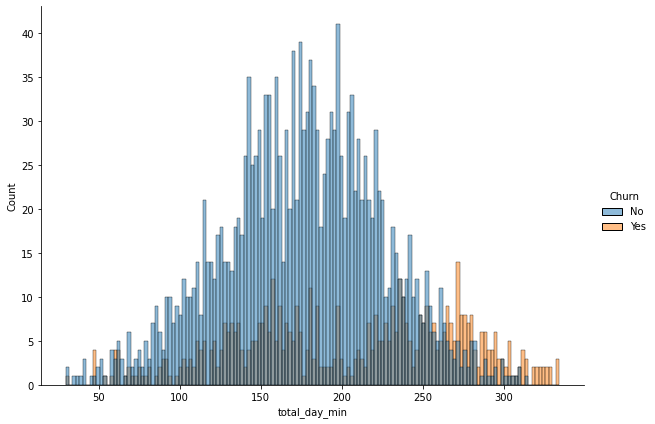

In [59]:
sns.displot(data=df, x='total_day_min', kind='hist',
            height=6, aspect=1.4, bins=144,
            hue='Churn')

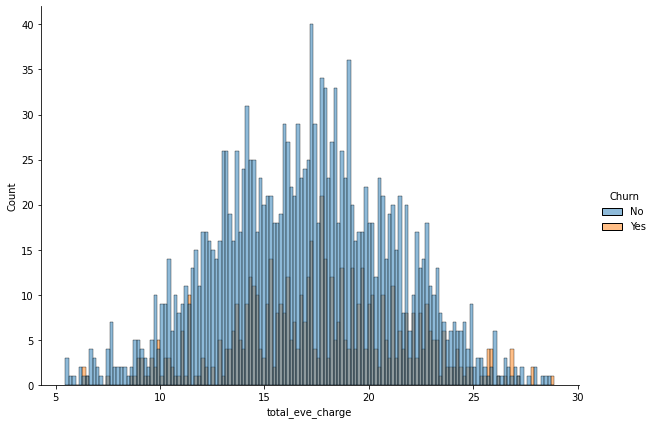

In [60]:
sns.displot(data=df, x='total_eve_charge', kind='hist',
            height=6, aspect=1.4, bins=144,
            hue='Churn')

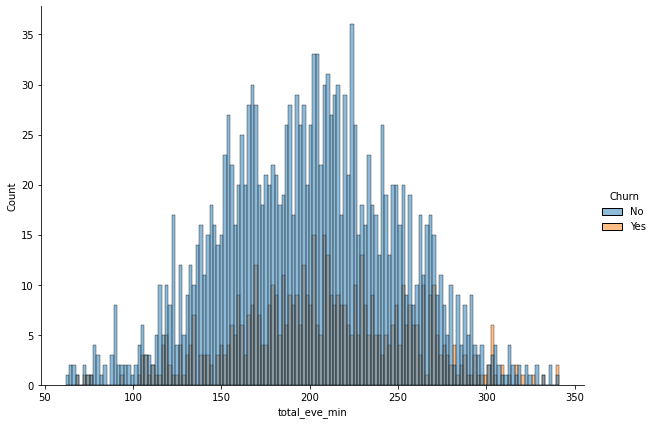

In [61]:
sns.displot(data=df, x='total_eve_min', kind='hist',
            height=6, aspect=1.4, bins=144,
            hue='Churn')

#### Voice Mail Plan

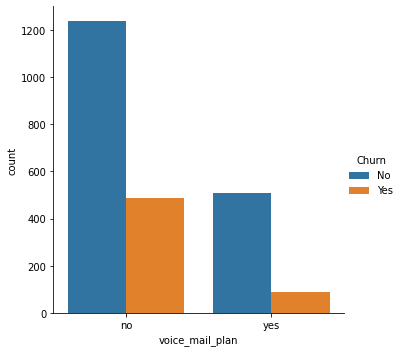

In [62]:
sns.catplot(x='voice_mail_plan', hue='Churn', kind='count', data=df)

## Data Encoding

In [63]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

df['intertiol_plan'].replace(to_replace='yes', value=1, inplace=True)
df['intertiol_plan'].replace(to_replace='no', value=0, inplace=True)

df['voice_mail_plan'].replace(to_replace='yes', value=1, inplace=True)
df['voice_mail_plan'].replace(to_replace='no', value=0, inplace=True)

df = pd.get_dummies(df, columns=['location_code'])

## Data Reduction
#### Highly Corelated Features
1. voice_mail_plan : number_vm_messages
2. total_day_min : total_day_charge
3. total_eve_min : total_eve_charge
4. total_night_minutes : total_night_charge
5. total_intl_minutes : total_intl_charge

<AxesSubplot:>

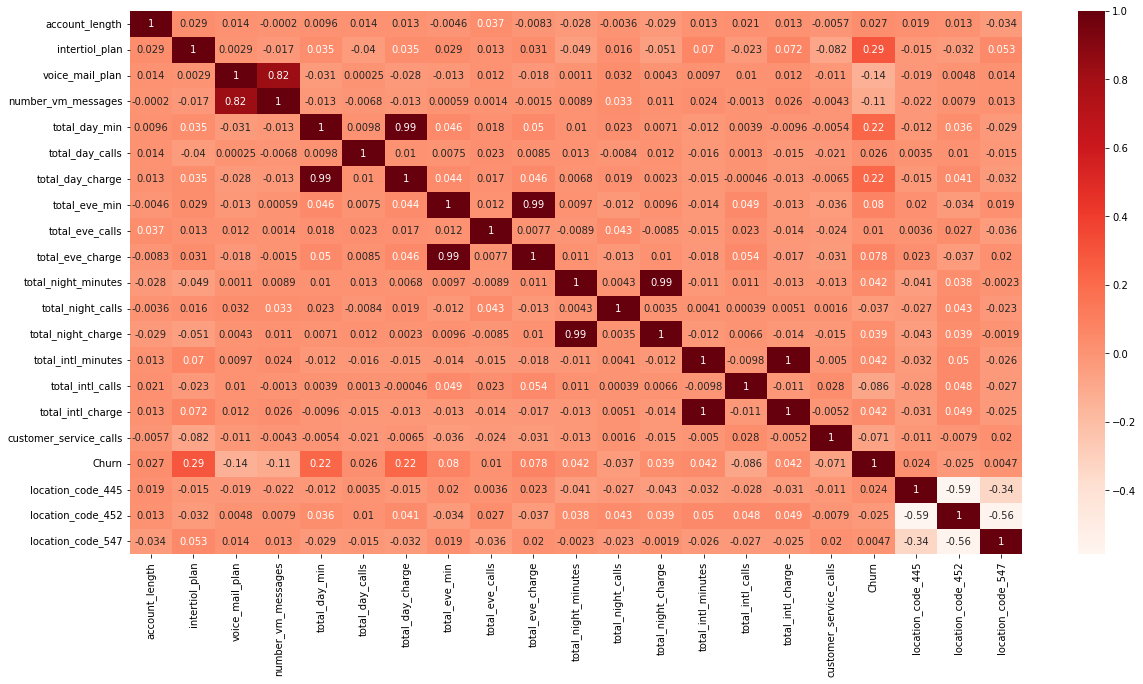

In [64]:
cor = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, cmap="Reds", annot=True)

<AxesSubplot:>

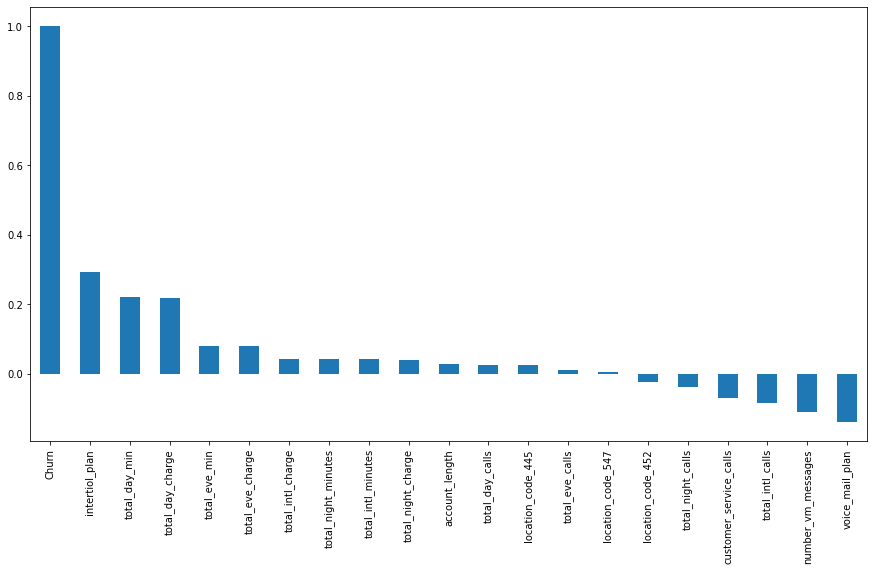

In [65]:
plt.figure(figsize=(15, 8))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [66]:
cor_target = abs(cor["Churn"])
relevent_features = cor_target[cor_target > 0.05]
relevent_features

intertiol_plan            0.291833
voice_mail_plan           0.138072
number_vm_messages        0.111241
total_day_min             0.219647
total_day_charge          0.218306
total_eve_min             0.079566
total_eve_charge          0.078473
total_intl_calls          0.085660
customer_service_calls    0.071383
Churn                     1.000000
Name: Churn, dtype: float64

In [67]:
features = ['intertiol_plan', 'voice_mail_plan', 'number_vm_messages', 'total_day_charge', 'total_eve_charge', 'total_intl_calls', 'customer_service_calls']
X = df[features]
y = df['Churn']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

## Modeling
### 1. Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(random_state=42)
# tree.fit(X_train, y_train)
# y_pred = tree.predict(X_test)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

NameError: name 'X_train' is not defined

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# max_depth = [int(i) for i in range(200)]
# max_leaf_nodes = [int(j) for j in range (10)]
# random_grid = {'max_depth': max_depth,
#                'max_leaf_nodes': max_leaf_nodes}
# rf_random = RandomizedSearchCV(estimator = tree, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_random.best_params_

In [ ]:
tree = DecisionTreeClassifier(max_leaf_nodes= 9, max_depth=128, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

### 2. Random Forest Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state = 42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

In [72]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [int(i) for i in range(20)]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [int(i) for i in range(10)]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400

In [75]:
rf = RandomForestClassifier(bootstrap = True,
 max_depth = 20,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 6,
 n_estimators = 1200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8502581755593803


### XGBoost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
